In [1]:
pip install yfinance

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.0/3.0 MB 11.2 MB/s eta 0:00:00
  Installing build dependencies ... - \ | / - \ | done
  Getting requirements to build wheel ... - done
  Preparing metadata (pyproject.toml) ... - done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 73.0/73.0 kB 3.7 MB/s eta 0:00:00
  Created wheel for peewee: filename=peewee-3.17.1-cp310-cp310-linux_x86_64.whl size=291653 sha256=dab4cabbf90d51211d209b687051e4cc4bbb8febb431b8c2594a06c6169beb7b
  Stored in directory: /root/.cache/pip/wheels/d7/35/5c/1374782be033462df5f40174d8d879519d64ed8c25a1977554
Successfully built peewee
Note: you may need to restart the kernel to use updated packages.


In [2]:
import pandas as pd
import numpy as np
import yfinance as yf
import statsmodels.api as sm

In [3]:
raw_data_1 = pd.read_csv('/kaggle/input/stock-returns/DGS3MO (2).csv')
raw_data_2 = pd.read_csv('/kaggle/input/stock-returns/DGS3MO (3).csv')
raw_data_3 = pd.read_csv('/kaggle/input/stock-returns/TSLA (1).csv')
raw_data_4 = pd.read_csv('/kaggle/input/stock-returns/TSLA 3 months historical data (1).csv')


### Check The Structure of Each Dataset

In [4]:
print("DGS3MO (2) Dataset:")
print(raw_data_1.head())
print("\nDGS3MO (3) Dataset:")
print(raw_data_2.head())
print("\nTSLA (1) Dataset:")
print(raw_data_3.head())
print("\nTSLA 3 Months Historical Data Dataset:")
print(raw_data_4.head())

DGS3MO (2) Dataset:
        DATE DGS3MO
0  3/14/2019   2.45
1  3/15/2019   2.45
2  3/18/2019   2.44
3  3/19/2019   2.46
4  3/20/2019   2.48

DGS3MO (3) Dataset:
        DATE DGS3MO
0  3/14/2019   2.45
1  3/15/2019   2.45
2  3/18/2019   2.44
3  3/19/2019   2.46
4  3/20/2019   2.48

TSLA (1) Dataset:
        Date        Open        High         Low       Close   Adj Close  \
0  3/17/2023  184.520004  186.220001  177.330002  180.130005  180.130005   
1  3/20/2023  178.080002  186.440002  176.350006  183.250000  183.250000   
2  3/21/2023  188.279999  198.000000  188.039993  197.580002  197.580002   
3  3/22/2023  199.300003  200.660004  190.949997  191.149994  191.149994   
4  3/23/2023  195.259995  199.309998  188.649994  192.220001  192.220001   

      Volume  
0  133197100  
1  129684400  
2  153391400  
3  150376400  
4  144193900  

TSLA 3 Months Historical Data Dataset:
        Date        Open        High         Low       Close   Adj Close  \
0  9/18/2023  271.160004  271.440002 

### Data Preparation

#### Convert date columns to datetime format

In [5]:
raw_data_1['DATE'] = pd.to_datetime(raw_data_1['DATE'])
raw_data_2['DATE'] = pd.to_datetime(raw_data_2['DATE'])
raw_data_3['Date'] = pd.to_datetime(raw_data_3['Date'])
raw_data_4['Date'] = pd.to_datetime(raw_data_4['Date'])

#### Set date columns as index

In [6]:
raw_data_1.set_index('DATE', inplace=True)
raw_data_2.set_index('DATE', inplace=True)
raw_data_3.set_index('Date', inplace=True)
raw_data_4.set_index('Date', inplace=True)

#### Check the data types and index of each dataset

In [7]:
print("DGS3MO (2) Dataset:")
print(raw_data_1.info())
print("\nDGS3MO (3) Dataset:")
print(raw_data_2.info())
print("\nTSLA (1) Dataset:")
print(raw_data_3.info())
print("\nTSLA 3 Months Historical Data Dataset:")
print(raw_data_4.info())

DGS3MO (2) Dataset:
<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1306 entries, 2019-03-14 to 2024-03-14
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   DGS3MO  1306 non-null   object
dtypes: object(1)
memory usage: 20.4+ KB
None

DGS3MO (3) Dataset:
<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1306 entries, 2019-03-14 to 2024-03-14
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   DGS3MO  1306 non-null   object
dtypes: object(1)
memory usage: 20.4+ KB
None

TSLA (1) Dataset:
<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 251 entries, 2023-03-17 to 2024-03-15
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Open       251 non-null    float64
 1   High       251 non-null    float64
 2   Low        251 non-null    float64
 3   Close      251 non-null    float64
 4   Adj Close  251 n

#### Convert 'DGS3MO' column to numeric

In [8]:
raw_data_1['DGS3MO'] = pd.to_numeric(raw_data_1['DGS3MO'], errors='coerce')
raw_data_2['DGS3MO'] = pd.to_numeric(raw_data_2['DGS3MO'], errors='coerce')

#### Check for missing values

In [9]:
print("Missing values in DGS3MO (2):", raw_data_1['DGS3MO'].isnull().sum())
print("Missing values in DGS3MO (3):", raw_data_2['DGS3MO'].isnull().sum())

Missing values in DGS3MO (2): 53
Missing values in DGS3MO (3): 53


#### Fill missing values using linear interpolation

In [10]:
raw_data_1['DGS3MO'] = raw_data_1['DGS3MO'].interpolate(method='linear')
raw_data_2['DGS3MO'] = raw_data_2['DGS3MO'].interpolate(method='linear')

#### Check if missing values are filled

In [11]:
print("Missing values in DGS3MO (2) after filling:", raw_data_1['DGS3MO'].isnull().sum())
print("Missing values in DGS3MO (3) after filling:", raw_data_2['DGS3MO'].isnull().sum())

Missing values in DGS3MO (2) after filling: 0
Missing values in DGS3MO (3) after filling: 0


### Merge Datasets

#### Merge T-Bill yields datasets

In [12]:
tbill_yields = pd.concat([raw_data_1, raw_data_2])

#### Merge TSLA stock price datasets

In [13]:
tsla_stock = pd.concat([raw_data_3, raw_data_4])

###  Calculate Returns

#### Calculate daily returns for TSLA stock

In [14]:
tsla_stock['Returns'] = tsla_stock['Adj Close'].pct_change()

#### Drop rows with missing values (first row)

In [15]:
tsla_stock.dropna(inplace=True)

### Run OLS Regression

#### Merge datasets for regression analysis

In [16]:
merged_data = pd.merge(tsla_stock, tbill_yields, left_index=True, right_index=True, how='inner')

#### Define independent and dependent variables

In [17]:
X = sm.add_constant(merged_data[['DGS3MO']])
y = merged_data['Returns']


#### Run OLS regression

In [18]:
model = sm.OLS(y, X)
results = model.fit()

#### Print summary of regression results

In [19]:
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                Returns   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                 -0.001
Method:                 Least Squares   F-statistic:                    0.1719
Date:                Wed, 20 Mar 2024   Prob (F-statistic):              0.679
Time:                        08:19:09   Log-Likelihood:                 1161.0
No. Observations:                 690   AIC:                            -2318.
Df Residuals:                     688   BIC:                            -2309.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0223      0.051      0.435      0.6

### Analysis

#### Check for violations of OLS assumptions

#### Linearity: Scatterplots of independent variables against dependent variable

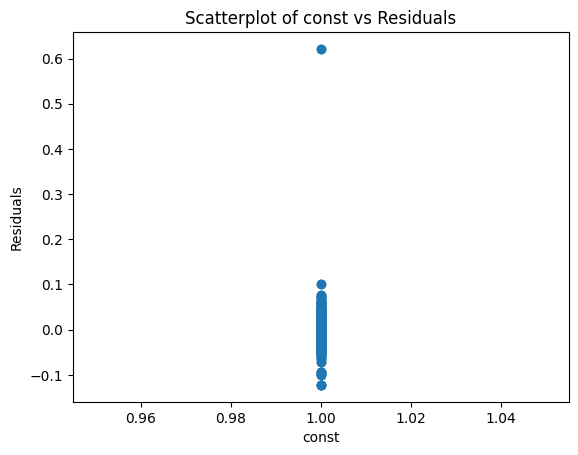

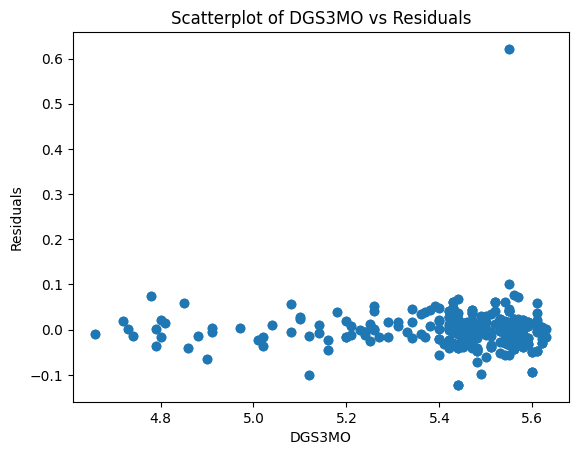

In [20]:
import statsmodels.api as sm
import matplotlib.pyplot as plt
import pandas as pd

for col in X.columns:
    plt.scatter(X[col], results.resid)
    plt.xlabel(col)
    plt.ylabel("Residuals")
    plt.title(f"Scatterplot of {col} vs Residuals")
    plt.show()

#### Independence of Errors: Residuals vs Fitted values and Durbin-Watson test

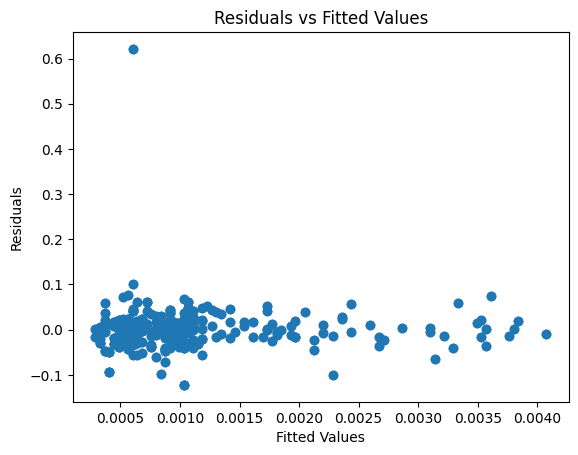

In [21]:
plt.scatter(results.fittedvalues, results.resid)
plt.xlabel("Fitted Values")
plt.ylabel("Residuals")
plt.title("Residuals vs Fitted Values")
plt.show()

#### Homoscedasticity: Residuals vs Fitted values and Breusch-Pagan test

In [22]:
_, p_het, _, _ = sm.stats.diagnostic.het_breuschpagan(results.resid, results.model.exog)
print("Breusch-Pagan test p-value:", p_het)

Breusch-Pagan test p-value: 0.3626575473336514


#### Normality of Errors: Histogram and Q-Q plot of residuals, and statistical tests

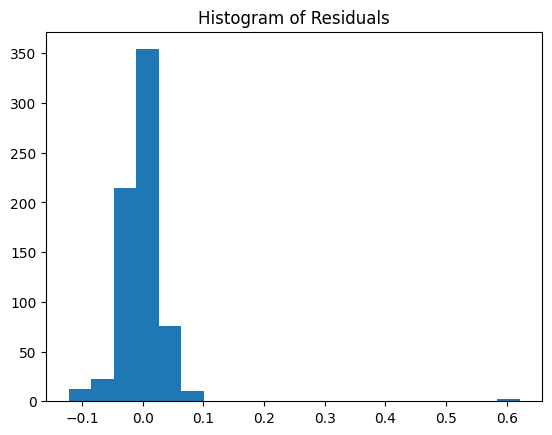

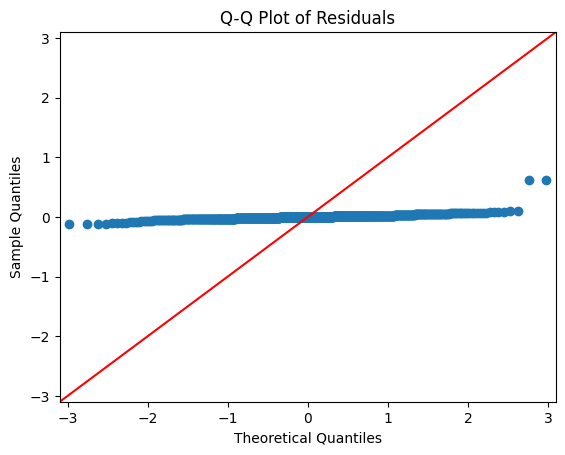

Jarque-Bera test p-value: 0.0
Skewness of residuals: 7.478253577402254
Kurtosis of residuals: 106.42977928641535


In [23]:
plt.hist(results.resid, bins=20)
plt.title("Histogram of Residuals")
plt.show()

sm.qqplot(results.resid, line='45')
plt.title("Q-Q Plot of Residuals")
plt.show()

jb, p_jb, skew, kurtosis = sm.stats.stattools.jarque_bera(results.resid)
print("Jarque-Bera test p-value:", p_jb)
print("Skewness of residuals:", skew)
print("Kurtosis of residuals:", kurtosis)

#### Multicollinearity: VIF calculation

In [24]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif = pd.DataFrame()
vif["Variable"] = X.columns
vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
print("Variance Inflation Factors:")
print(vif)

Variance Inflation Factors:
  Variable         VIF
0    const  889.494131
1   DGS3MO    1.000000
